In [1]:
import os
from matplotlib.pyplot import *
from numpy import *
import sys

try: 
    sys.path.remove('/home/adun6414/JModelica/v2_0/JModelica/Python')
    sys.path.append('/home/adun6414/Downloads/PyFMI')
except:
    print(sys.path)
    
import pyfmi

current_folder=os.getcwd()

for ls in sys.path:
    if current_folder+'/' in ls:
        sys.path.remove(ls)
os.listdir(os.getcwd())

datafolder=current_folder+'/data/'
sys.path.append(current_folder+'/src/')

# MPC Setup
- 3 day simulation period
- 10 min sampling time for MPC-Comfort
## load weather forecast (assumed perfect forecast, saved from the simulation model)

In [2]:
dt=10*60; # 10 min sampling time
Ndata= 2*24*int(3600*1./dt)# 3 days data
Tref=0 # reference temperature

start_time=6*30*24*3600.
simend_time=start_time+(Ndata-1)*dt # simulation end time to get weather data 
T=start_time+np.linspace(0,Ndata-1,Ndata)*dt 

testend_time=start_time+Ndata/2.*dt # end time for MPC & conven PI control

# ==============================================================================
# Obtain weather & gain forecast for MPC algorithm test ==============================

import numpy as np
import scipy.io
import scipy.interpolate

WF=scipy.io.loadmat(os.path.join(datafolder,'WeatherForecast'))
WInterpFun=scipy.interpolate.interp1d(squeeze(WF['time [sec]']), 
                                      np.vstack((WF['Toa [K]']-273.15-Tref,WF['qinc [kW/m2]'],WF['Qgain [kW]'])))

## load system identification data

In [3]:
from H_utility_ import *
from H_blkdiag import H_blkdiag

thetaPMV=scipy.io.loadmat(os.path.join(datafolder,'PMVfit'))['theta']
MOD=sp.io.loadmat(os.path.join(datafolder,'EvelopeModel'))
from CVX_PMV_py3_ import CVX_PMV
Np= 24*6 #int(fix(0.5*24*1./Ts_hr))
NpUMPC=Np
Pmat0=np.array([1]) # unit power per unit cooling capacity, i.e. the inverse of COP
lb0=np.array([0])  # cooling capacity lower bound [0]
ub0=np.array([20]) # cooling capacity upper bound [kW]
UMPC=CVX_PMV(MOD['A'],MOD['B'],MOD['C'],MOD['K'],Np,Np,Pmat0,lb0,ub0,thetaPMV,comfmetric='max')

# Perform MPC Simulation
## initialization & load fmu 

In [4]:
yk=mat([[20],[-thetaPMV[0]]])


t_MPC=[]
Tz_MPC=[]
PMV_MPC=[]
Q_MPC=[]
R_MPC=[]
Toa_MPC=[]
qGh_MPC=[]
qConv_Wpm2_MPC=[]
qRad_Wpm2_MPC=[]
Pc_MPC=[]
SPc_MPC=[]

import scipy.linalg

myfmu=os.path.join(datafolder,'H_modelica_lib_HCJR_Case600FF_io_thickmass_MPC_PMV.fmu')
fmuinpy=pyfmi.load_fmu(myfmu)
_sim_opts=fmuinpy.simulate_options()
_sim_opts['result_handling']='memory'

Could not find GLIMDA.


Final Run Statistics: --- 

 Number of steps                                 : 521
 Number of function evaluations                  : 525
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 524
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 522

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 2.931

SP: [[21.27039129]] vu: [-1.51029421e-11] vl: [-1.43534475e-11]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-

SP: [[20.65878817]] vu: [-2.71644091e-13] vl: [-2.82416929e-13]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 516
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 512
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-

SP: [[19.75794131]] vu: [-1.26519755e-12] vl: [-4.65108746e-13]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 506
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 502
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-

SP: [[18.70046441]] vu: [-5.07814413e-12] vl: [-5.4738398e-12]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 506
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 502
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-0

SP: [[18.82607963]] vu: [-2.41194632e-13] vl: [-2.65442527e-13]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 506
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 502
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502
 Number of time events                           : 1

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06

SP: [[21.28592995]] vu: [-1.75955473e-09] vl: [0.25258357]
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 508
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 503

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3

SP: [[24.76929934]] vu: [-3.0163011e-12] vl: [-3.91414894e-12]
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 508
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 503

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-0

SP: [[24.86598606]] vu: [-2.78472183e-13] vl: [-3.09644192e-13]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-

SP: [[25.05269732]] vu: [-4.05304478e-13] vl: [-5.16835192e-13]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-

SP: [[26.9771986]] vu: [2.06232893e-10] vl: [0.32345961]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502
 Number of time events                           : 1

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000

SP: [[27.16890851]] vu: [8.90086974e-10] vl: [0.42675411]
Final Run Statistics: --- 

 Number of steps                                 : 509
 Number of function evaluations                  : 510
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 509
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 510

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.

SP: [[27.26867187]] vu: [1.37651424e-10] vl: [0.37732132]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.

SP: [[27.3192433]] vu: [-3.29135555e-12] vl: [0.27827958]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.

SP: [[27.24706823]] vu: [1.15935603e-09] vl: [0.22621614]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.

SP: [[27.21379246]] vu: [2.21718574e-09] vl: [0.29097979]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.

SP: [[27.27701786]] vu: [1.91771637e-09] vl: [0.16853869]
Final Run Statistics: --- 

 Number of steps                                 : 501
 Number of function evaluations                  : 505
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 501
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 502
 Number of time events                           : 1

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.000

SP: [[28.6046001]] vu: [-2.30928826e-13] vl: [-3.18648091e-13]
Final Run Statistics: --- 

 Number of steps                                 : 507
 Number of function evaluations                  : 508
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 507
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 508

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-0

SP: [[27.54641545]] vu: [1.32674774e-09] vl: [0.29847887]
Final Run Statistics: --- 

 Number of steps                                 : 502
 Number of function evaluations                  : 508
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 504
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 503

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3.

SP: [[26.51609622]] vu: [-2.33474716e-09] vl: [0.73359924]
Final Run Statistics: --- 

 Number of steps                                 : 507
 Number of function evaluations                  : 519
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 2
 Number of nonlinear iterations                  : 515
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 508

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3

SP: [[25.52565443]] vu: [-4.13447696e-09] vl: [1.06799984]
Final Run Statistics: --- 

 Number of steps                                 : 504
 Number of function evaluations                  : 514
 Number of Jacobian evaluations                  : 9
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 510
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 505

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.0000e-06 2.9315e-06 2.9315e-06 2.9315e-06 3.0000e-06
 3

Text(0.5, 0, 'Hour')

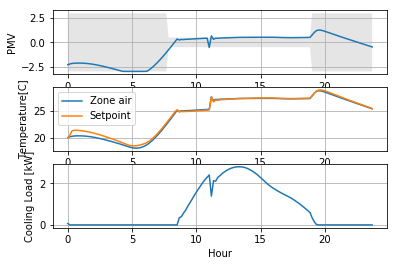

In [5]:

for k in range(1,int((testend_time-start_time)/dt)):
    #%measurement update    
    cur_t=start_time+(k-1)*dt
    
    if k>1:
        # CURRENT (see Kalman filter equ) data sampling and shift & scaling
        wk=np.mat(WInterpFun(cur_t)).T # already scaled and shifted
        yk[0]=Tz_MPC[-1]-Tref-273.15
        yk[1]=max(min(PMV_MPC[-1],3),-3)-(thetaPMV[0]+(thetaPMV[1]+thetaPMV[2])*Tref)[0]
        # I have to measure inputs for updates (note that for Hudelson, stage was directly controllable & measureable)        
        uk=-np.trapz(res['Q'],res['time'])/(res['time'][-1]-res['time'][0])/1000.
        UMPC.Kestim(yk,uk,wk) # model is defined with a 15 min sampling time
 
    # control update            
    if k==1:
        uk=np.mat([0]) # cooling
        ySPk=np.mat(20)

    elif k>1:
        pre_t=cur_t+np.linspace(1,NpUMPC,NpUMPC)*dt
        #(TuUMPC,TlUMPC,R,dum)=HS.schedule(NpUMPC,dt/3600.,1,cur_t)		
        Rs     =np.mat(ones((UMPC.Np,1))) #R # cooling $/kWh
        Ws     =np.mat(WInterpFun(pre_t)).T

        # PMV lower and upper bounds
        CLs=mat(H_schedule(pre_t.T,[8,19],-0.5,-3))-thetaPMV[0]
        CUs=mat(H_schedule(pre_t,[8,19],0.5,3))-thetaPMV[0]
        
        (ySPk,uk,flagUMPC)=UMPC.UMPC(yk,CLs,CUs,Ws,Rs)
    

    SPc=c2k(ySPk)
    SPh=SPc-10
    
    # system response to control
    if k > 1:
        _sim_opts['initialize'] = False
    
    tt=np.linspace((k-1)*dt,k*dt,2)
    Pert=H_schedule(np.mat(cur_t),[11,24],0.61,0.96)
    
    # Trousers, long-sleeve shirt, 0.61
    # Trousers, long-sleeve shirt, suit jacket, 0.96
    spspPert=np.kron(np.vstack((np.array(SPc),np.array(SPh),np.array(Pert))),np.array([1.,1.]))
    
    In=(['SPc','SPh','Pert'],np.vstack((tt,spspPert)).T)

    res=fmuinpy.simulate(start_time=cur_t,final_time=cur_t+dt,options = _sim_opts, input=In)
    
    # state update
    #x=fmuinpy.continuous_states[0:1]
    t_MPC.append(res['time'][-1])
    Tz_MPC.append(res['y'][-1])
    PMV_MPC.append(res['PMV'][-1])
    Q_MPC.append(res['Q'][-1])
    R_MPC.append(res['SC.R'][-1])
    Pc_MPC.append(res['Pc'][-1])
    SPc_MPC.append(SPc-273.15)
    
    
    Toa_MPC.append(res['weaBus.TDryBul'][-1])
    qGh_MPC.append(res['weaBus.HGloHor'][-1])
    qConv_Wpm2_MPC.append(res['qConGai_flow.y'][-1])
    qRad_Wpm2_MPC.append(res['qRadGai_flow.y'][-1])
    #if max(abs(UMPC.inno))[0,0]>2:
    #    input('a')
#%%    
figure(2)
hh=np.squeeze(vstack(t_MPC)-t_MPC[0])/3600
ax=subplot(3,1,1)
ax.plot(hh,vstack(PMV_MPC))
YL=np.squeeze(np.array(H_schedule(vstack(t_MPC).T,[8,19],-0.5,-3)))
YU=np.squeeze(np.array(H_schedule(vstack(t_MPC).T,[8,19],0.5,3)))
ax.fill_between(hh,YL,YU,facecolor='grey',alpha=0.2)
ax.grid(True)
ax.set_ylabel('PMV')


subplot(312)
plot(hh,hstack((vstack(Tz_MPC)-273.15,vstack(SPc_MPC))))
grid(True); ylabel('Temperature[C]'); legend(['Zone air','Setpoint'])
subplot(313)
plot(hh,-vstack(Q_MPC)/1e3); ylabel('Cooling Load [kW]')
grid(True)
xlabel('Hour')

# Conventional Control Simulation

In [6]:
myfmu=os.path.join(datafolder,'H_modelica_lib_HCJR_Case600FF_io_thickmass_Conv_PMV.fmu')
fmuinpy=pyfmi.load_fmu(myfmu)
_sim_opts=fmuinpy.simulate_options()
_sim_opts['result_handling']='memory'

myfmu=os.path.join(datafolder,'H_modelica_lib_HCJR_Case600FF_io_thickmass_Conv_PMV.fmu')


tt=np.arange(start_time,testend_time,60*10)
Pert=np.squeeze(np.array(H_schedule(np.mat(tt),[11,24],0.61,0.96)))
In=(['Pert'],np.vstack((tt,Pert)).T)

res_Conv=fmuinpy.simulate(start_time=start_time,final_time=testend_time, options=_sim_opts,input=In)


Final Run Statistics: --- 

 Number of steps                                 : 1824
 Number of function evaluations                  : 2412
 Number of Jacobian evaluations                  : 47
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 136
 Number of nonlinear iterations                  : 2380
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 1863
 Number of state events                          : 2
 Number of time events                           : 24

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : [3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06
 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06
 3.0000e-06 3.0000e-06 3.0000e-06 2.9315e-06 3.0000e-06 3.0000e-06
 3.0000e-06 3.

# Result Comparisons between MPC-Comfort and Conventional Control

Energy Cost Savings:  14.09623723449131 ==============================


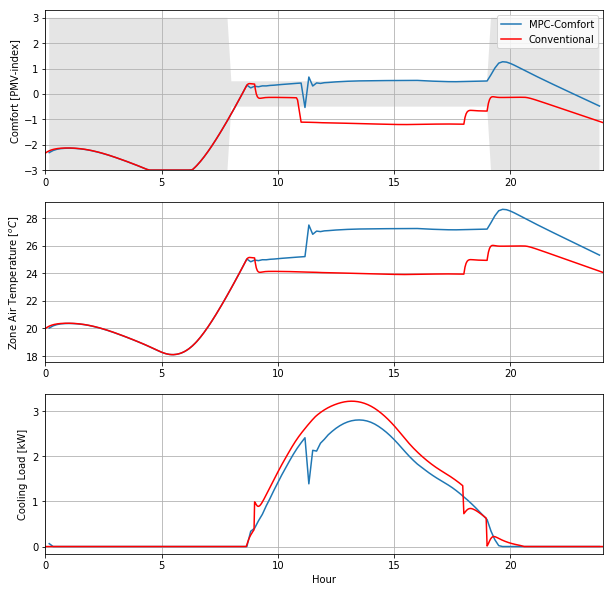

In [20]:
t_H=np.array(t_MPC)
Tz_H=np.array(Tz_MPC)
Qc_H=-np.array(Q_MPC)
PMV_H=np.array(PMV_MPC)    
t_C=res_Conv['time']
Tz_C=res_Conv['y']
PMV_C=res_Conv['PMV']
Qc_C=-res_Conv['Q']

figure(figsize=(10,10))
ax=subplot(311)
ax.plot((t_H-start_time)/(3600),PMV_H)
ax.plot((t_C-start_time)/(3600),PMV_C,'r')
YL=np.squeeze(np.array(H_schedule(t_H.T,[8,19],-0.5,-3)))
YU=np.squeeze(np.array(H_schedule(t_H.T,[8,19],0.5,3)))
ax.fill_between((t_H-start_time)/(3600),YL,YU,facecolor='grey',alpha=0.2)
ax.grid(True)
ax.set_ylabel('Comfort [PMV-index]')
ax.set_xlim([0,24])
ax.set_ylim(bottom=-3)
ax.legend(['MPC-Comfort','Conventional'])


ax=subplot(312)
ax.plot((t_H-start_time)/(3600),Tz_H-273.15)
ax.plot((t_C-start_time)/(3600),Tz_C-273.15,'r')
ax.set_xlim([0,24])
ax.grid(True)
ax.set_ylabel('Zone Air Temperature [$^oC$]')

ax=subplot(313)
ax.plot((t_H-start_time)/(3600),Qc_H/1e3)
ax.plot((t_C-start_time)/(3600),Qc_C/1e3,'r')
ax.set_xlim([0,24])
ax.grid(True)
ax.set_ylabel('Cooling Load [kW]')
ax.set_xlabel('Hour')
savefig('MPC_DR.pdf')

Ec_C=np.trapz(Qc_C,t_C)
Ec_H=np.trapz(Qc_H.T,t_H.T)
print("Energy Cost Savings: ", (Ec_C-Ec_H)/Ec_C*100, '==============================')

In [9]:
savefig('MPC_max.pdf')

<Figure size 432x288 with 0 Axes>